## Import required libraries

In [2927]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

## Load the dataset

In [2928]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [2929]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Check the shape of the dataset

In [2930]:
df.shape

(13320, 9)

## Check the statistical data of dataframe

In [2931]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [2932]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


## Data Preprocessing

In [2933]:
for col in df.columns:
    print(df[col].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

### Check for missing values

In [2934]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Since location, size, bath, balcony, society column have high no of missing values and low relevance to Price prediction, Hence we are dropping irrelevant columns

In [2935]:
df = df.drop(columns=['area_type', 'society', 'availability'], axis=1)

In [2936]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


### Checking the missing values

In [2937]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

Let's fill missing values in key columns using median (for numericals) or mode (for categoricals)

In [2938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [2939]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

There was only one missing value in the location column, which was filled with 'Whitefield', the most frequent location. This maintains data consistency.

In [2940]:
df['location'] = df['location'].fillna('Whitefield')

In [2941]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

The size column has only 16 missing values, which are filled with the most frequent value, 2 BHK, to maintain consistency.

In [2942]:
df['size'] = df['size'].fillna('2 BHK')

In [2943]:
df['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [2944]:
df['bath'].median() 

2.0

In [2945]:
# bathroom has 73 null values so we will replace them my median value.
df['bath'] = df['bath'].fillna(df['bath'].median())

In [2946]:
df['balcony'].value_counts()

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: count, dtype: int64

In [2947]:
df['balcony'].median() 

2.0

In [2948]:
# balcony has 609 null values so we will replace them my median value.
df['balcony'] = df['balcony'].fillna(df['balcony'].median())

In [2949]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [2950]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [2951]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [2952]:
## Let's split the no of bedroom from size column

df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [2953]:
df['BHK']=df['BHK'].astype(float)

In [2954]:
df.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0


In [2955]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
 6   BHK         13320 non-null  float64
dtypes: float64(4), object(3)
memory usage: 728.6+ KB


In [2956]:
df.describe()

,bath,balcony,price,BHK
count,13320.000000,13320.000000,13320.000000,13320.000000
mean,2.688814,1.603378,112.565627,2.802778
std,1.338754,0.803067,148.971674,1.294496
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000
50%,2.000000,2.000000,72.000000,3.000000
75%,3.000000,2.000000,120.000000,3.000000
max,40.000000,3.000000,3600.000000,43.000000


In [2957]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### 'total_sqft' has some range value.lets deal with these values

In [2958]:
## Lets create a function to get agg of two numbers for a range of total-sqft
def ConvertRange(x):

    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[0]))/2
    try:
        return float(x)
    except:
        return None

In [2959]:
df['total_sqft'] = df['total_sqft'].apply(ConvertRange)

In [2960]:
df.total_sqft.unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [2961]:
df.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
BHK            0
dtype: int64

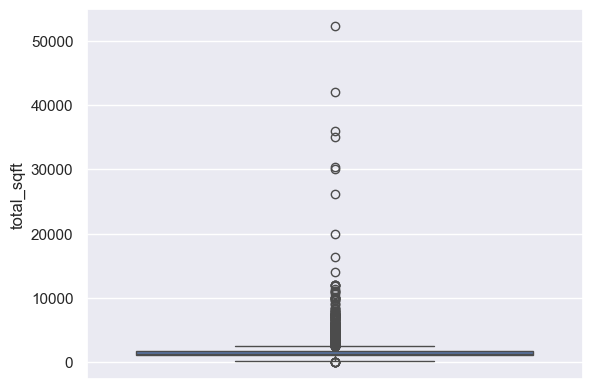

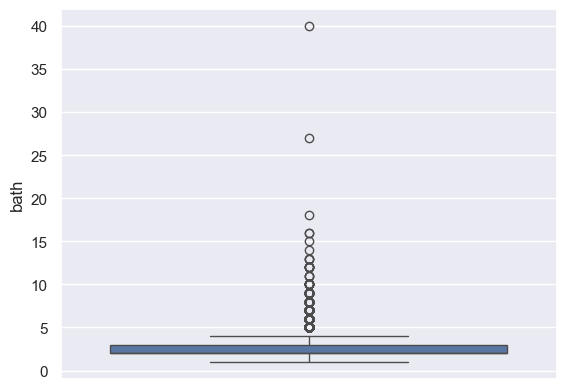

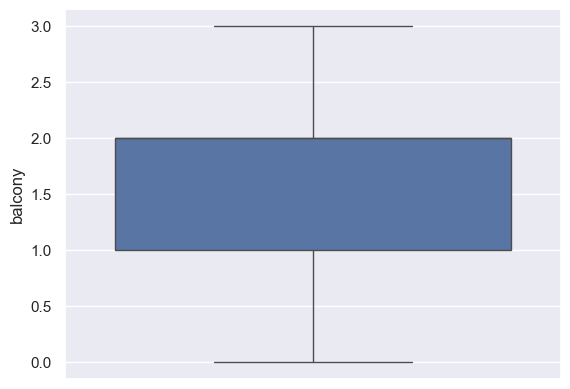

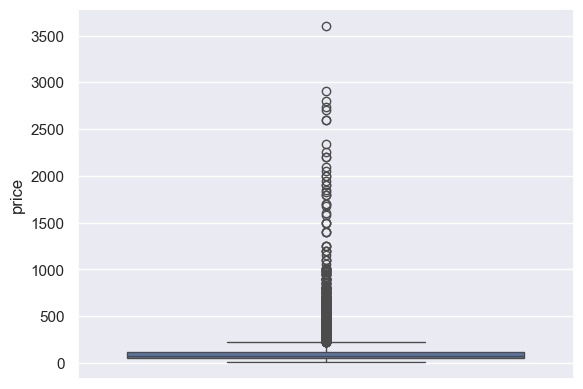

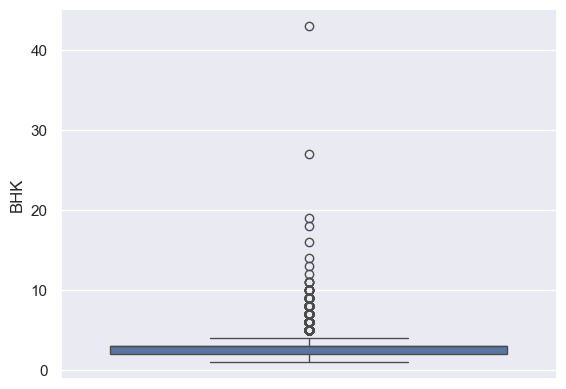

In [2962]:
### Checking outlier for numerical columns
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude = ['object']).columns):
    boxplot(i)

In [2963]:
## lets create a function to remove outlier
def remove_outliers_iqr(df, column, multiplier=1.5):
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate bounds
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Filter dataframe
    df_cleaned = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    # Optional: Print removed rows count
    removed_rows = len(df) - len(df_cleaned)
    print(f"Removed {removed_rows} outliers from {column}")
    
    return df_cleaned

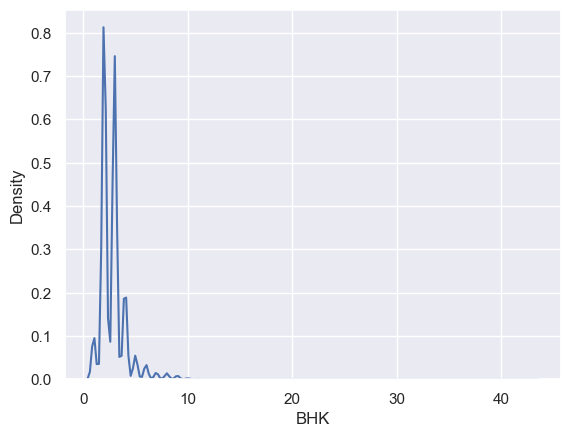

In [2964]:
## Lets remove outliers of BHK
sns.kdeplot(df['BHK'])
plt.show()

In [2965]:
df = remove_outliers_iqr(df, 'BHK')

Removed 846 outliers from BHK


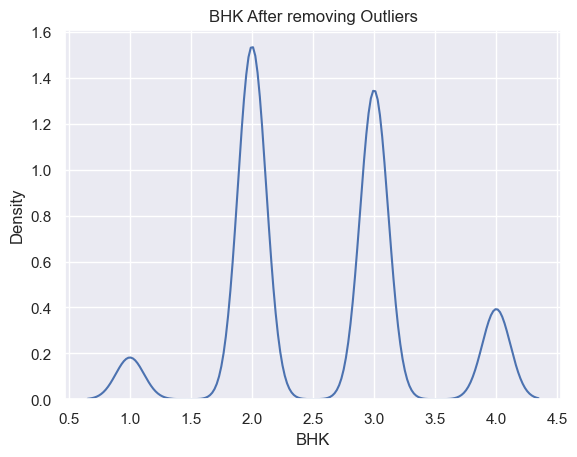

In [2966]:
sns.kdeplot(df['BHK'])
plt.title('BHK After removing Outliers')
plt.show()

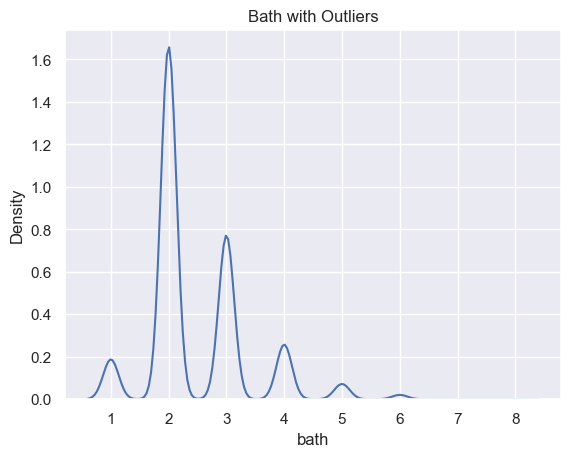

In [2967]:
## Lets remove outliers of bath
sns.kdeplot(df['bath'])
plt.title('Bath with Outliers')
plt.show()

In [2968]:
df = remove_outliers_iqr(df, 'bath')

Removed 391 outliers from bath


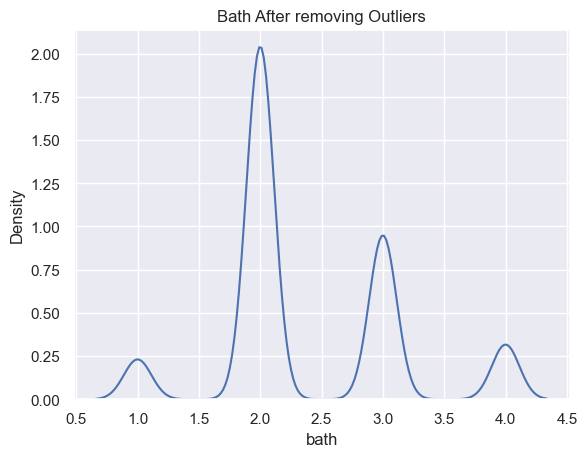

In [2969]:
sns.kdeplot(df['bath'])
plt.title('Bath After removing Outliers')
plt.show()

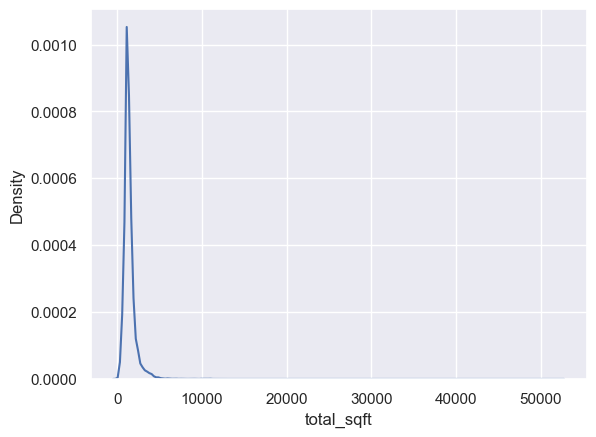

In [2970]:
sns.kdeplot(df['total_sqft'])
plt.show()

In [2971]:
df = remove_outliers_iqr(df, 'total_sqft')

Removed 953 outliers from total_sqft


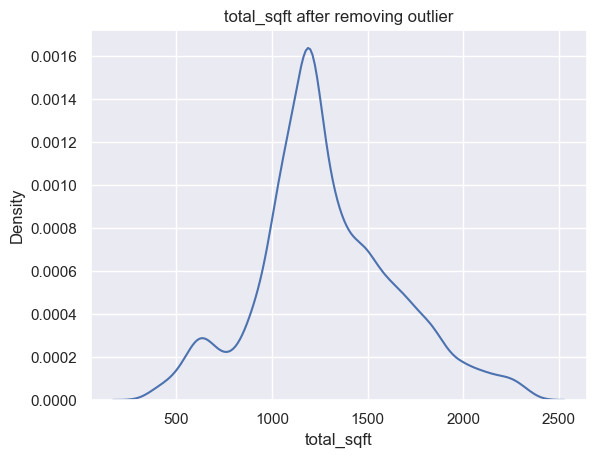

In [2972]:
sns.kdeplot(df['total_sqft'])
plt.title('total_sqft after removing outlier')
plt.show()

In [2973]:
df.describe()

,total_sqft,bath,balcony,price,BHK
count,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000
mean,1287.151880,2.292902,1.561545,76.884292,2.438455
std,363.444255,0.665514,0.775231,50.453671,0.674180
min,340.000000,1.000000,0.000000,8.440000,1.000000
25%,1075.000000,2.000000,1.000000,46.500000,2.000000
50%,1225.000000,2.000000,2.000000,65.000000,2.000000
75%,1500.000000,3.000000,2.000000,90.000000,3.000000
max,2357.000000,4.000000,3.000000,1063.000000,4.000000


In [2974]:
df['location'].value_counts()

location
Whitefield           431
Sarjapur  Road       335
Electronic City      297
Kanakpura Road       263
Thanisandra          221
                    ... 
Subbannaiah Palya      1
whitefiled             1
Medi Agrahara          1
Sadduguntepalya        1
Abshot Layout          1
Name: count, Length: 1125, dtype: int64

In [2975]:
df['location'] = df['location'].apply(lambda x: x.strip())

In [2976]:
df['location'].value_counts()

location
Whitefield         432
Sarjapur  Road     335
Electronic City    299
Kanakpura Road     263
Thanisandra        224
                  ... 
Ganesha Block        1
Malimakanapura       1
Garden Layout        1
Rainbow Drive        1
Abshot Layout        1
Name: count, Length: 1116, dtype: int64

In [2977]:
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              432
Sarjapur  Road          335
Electronic City         299
Kanakpura Road          263
Thanisandra             224
                       ... 
Kamdhenu Nagar            1
Kamakya Layout            1
Kalkere Channasandra      1
Kadarenahalli             1
whitefiled                1
Name: location, Length: 1116, dtype: int64

In [2978]:
locations_less_than_10_entries = location_stats[location_stats<=10]
locations_less_than_10_entries

location
Judicial Layout         10
Gunjur Palya            10
Tindlu                  10
Kodigehalli             10
Mico Layout             10
                        ..
Kamdhenu Nagar           1
Kamakya Layout           1
Kalkere Channasandra     1
Kadarenahalli            1
whitefiled               1
Name: location, Length: 913, dtype: int64

In [2979]:
df['location'] = df['location'].apply(lambda x: 'Other' if x in locations_less_than_10_entries else x )

In [2980]:
df['location'].value_counts()

location
Other                    2484
Whitefield                432
Sarjapur  Road            335
Electronic City           299
Kanakpura Road            263
                         ... 
Marsur                     11
Iblur Village              11
Banashankari Stage VI      11
Kadubeesanahalli           11
Shivaji Nagar              11
Name: count, Length: 204, dtype: int64

In [2981]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11130 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    11130 non-null  object 
 1   size        11130 non-null  object 
 2   total_sqft  11130 non-null  float64
 3   bath        11130 non-null  float64
 4   balcony     11130 non-null  float64
 5   price       11130 non-null  float64
 6   BHK         11130 non-null  float64
dtypes: float64(5), object(2)
memory usage: 695.6+ KB


In [2982]:
df.describe()

,total_sqft,bath,balcony,price,BHK
count,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000
mean,1287.151880,2.292902,1.561545,76.884292,2.438455
std,363.444255,0.665514,0.775231,50.453671,0.674180
min,340.000000,1.000000,0.000000,8.440000,1.000000
25%,1075.000000,2.000000,1.000000,46.500000,2.000000
50%,1225.000000,2.000000,2.000000,65.000000,2.000000
75%,1500.000000,3.000000,2.000000,90.000000,3.000000
max,2357.000000,4.000000,3.000000,1063.000000,4.000000


In [2983]:
df.describe()

,total_sqft,bath,balcony,price,BHK
count,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000
mean,1287.151880,2.292902,1.561545,76.884292,2.438455
std,363.444255,0.665514,0.775231,50.453671,0.674180
min,340.000000,1.000000,0.000000,8.440000,1.000000
25%,1075.000000,2.000000,1.000000,46.500000,2.000000
50%,1225.000000,2.000000,2.000000,65.000000,2.000000
75%,1500.000000,3.000000,2.000000,90.000000,3.000000
max,2357.000000,4.000000,3.000000,1063.000000,4.000000


In [2984]:
df.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2.0


In [2985]:
df.shape

(11130, 7)

### Creating the price_per_sqft Feature
A new column, price_per_sqft, is added to represent the price per square foot for each property. This feature enables more effective comparison of property values across different locations and sizes.

In [2986]:
df['price_per_sqft'] = round(df['price']*100000 / df['total_sqft'],2)

In [2987]:
df.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2.0,3699.81
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3.0,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3.0,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2.0,4250.00
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2.0,3247.86


In [2988]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000,11130.000000
mean,1287.151880,2.292902,1.561545,76.884292,2.438455,5889.220104
std,363.444255,0.665514,0.775231,50.453671,0.674180,3511.843511
min,340.000000,1.000000,0.000000,8.440000,1.000000,625.190000
25%,1075.000000,2.000000,1.000000,46.500000,2.000000,4138.480000
50%,1225.000000,2.000000,2.000000,65.000000,2.000000,5143.435000
75%,1500.000000,3.000000,2.000000,90.000000,3.000000,6538.460000
max,2357.000000,4.000000,3.000000,1063.000000,4.000000,176470.590000


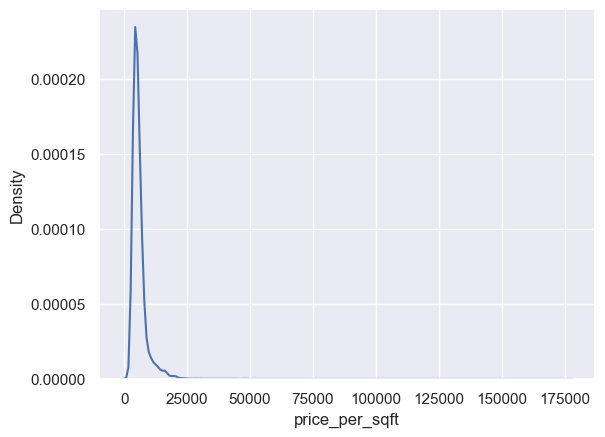

In [2989]:
sns.kdeplot(df['price_per_sqft'])
plt.show()

In [2990]:
df = remove_outliers_iqr(df, 'price_per_sqft')

Removed 774 outliers from price_per_sqft


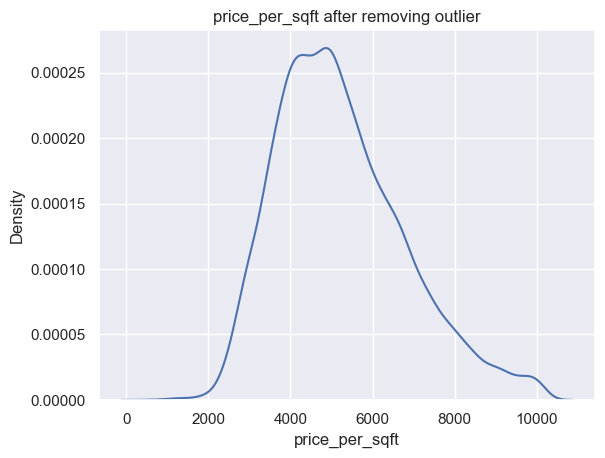

In [2991]:
sns.kdeplot(df['price_per_sqft'])
plt.title('price_per_sqft after removing outlier')
plt.show()

In [2992]:
df.shape

(10356, 8)

In [2993]:
df.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000,10356.000000
mean,1288.725463,2.250290,1.568849,68.892735,2.395616,5225.757476
std,351.762908,0.620684,0.766759,32.771303,0.636425,1564.566015
min,340.000000,1.000000,0.000000,8.440000,1.000000,625.190000
25%,1080.000000,2.000000,1.000000,45.500000,2.000000,4060.872500
50%,1230.000000,2.000000,2.000000,60.805000,2.000000,5000.000000
75%,1500.000000,3.000000,2.000000,85.000000,3.000000,6181.820000
max,2357.000000,4.000000,3.000000,225.000000,4.000000,10135.140000


In [2994]:
df = df.drop(columns=['size'], axis=1)

In [2995]:
df.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.81
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.56
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.89
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.00
5,Whitefield,1170.0,2.0,1.0,38.00,2.0,3247.86


In [2996]:
df.shape

(10356, 7)

In [2997]:
## Save the cleaned data to a csv file
df.to_csv("Cleaned_data.csv")

### Correlation Matrix

In [2998]:
num_featrures = df.select_dtypes(include='number')
corr = num_featrures.corr()
corr

,total_sqft,bath,balcony,price,BHK,price_per_sqft
total_sqft,1.000000,0.729176,0.356068,0.781631,0.719732,0.281130
bath,0.729176,1.000000,0.302864,0.613444,0.773163,0.283494
balcony,0.356068,0.302864,1.000000,0.215052,0.294162,0.007847
price,0.781631,0.613444,0.215052,1.000000,0.546935,0.791699
BHK,0.719732,0.773163,0.294162,0.546935,1.000000,0.208308
price_per_sqft,0.281130,0.283494,0.007847,0.791699,0.208308,1.000000


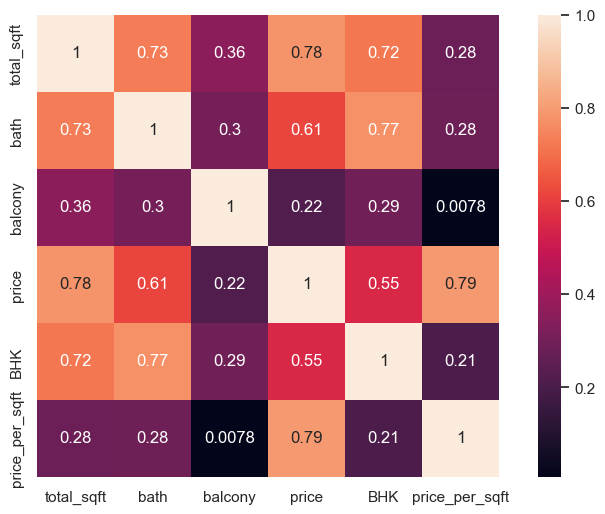

In [3017]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, square=True)
plt.show()

In [3000]:
## Split the data features and target variable
X = df.drop(columns=['price'])
y = df['price']
X.shape, y.shape

((10356, 6), (10356,))

## Model Building

In [3001]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [3002]:
## Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3003]:
print(X_train.shape)
print(X_test.shape)

(8284, 6)
(2072, 6)


In [3004]:
column_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['location']),
    remainder='passthrough'
)

1. OneHotEncoder() converts categorical data into binary columns
2. sparse_output=False means the output will be a dense array instead of a sparse matrix
3. 'location' specifies that this encoding should be applied to the 'location' column

In [3005]:
## Normalize the numerical features
scaler = StandardScaler()

In [3006]:
## Instantiate Linear regression model
lr = LinearRegression()

In [3007]:
## Create pipeline
pipe = make_pipeline(column_trans, scaler, lr)

In [3008]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [3009]:
# Making Predictions
y_pred_lr = pipe.predict(X_test)

In [3010]:
# Evaluating the Model
r2_score(y_test, y_pred_lr)

0.9711354335229297

In [3011]:
lasso = Lasso()
# Create Pipeline
pipe = make_pipeline(column_trans, scaler, lasso)

In [3012]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [3013]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.9652003318941882

In [3014]:
ridge = Ridge()
# Create Pipeline
pipe = make_pipeline(column_trans, scaler, ridge)
pipe.fit(X_train, y_train)
y_pred_rd=pipe.predict(X_test)
r2_score(y_test,y_pred_rd)

0.9711297399031293

In [3015]:
rfc=RandomForestRegressor()
pipe=make_pipeline(column_trans,scaler,rfc)
pipe.fit(X_train,y_train)
y_pred_d=pipe.predict(X_test)
r2_score(y_test,y_pred_d)

0.9995521123935214

In [3016]:
xgb=XGBRegressor()
pipe=make_pipeline(column_trans,scaler,rfc)
pipe.fit(X_train,y_train)
y_pred_d=pipe.predict(X_test)
r2_score(y_test,y_pred_d)

0.9995316693200262